In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

In [5]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [6]:
products = pd.read_csv("products.csv",delimiter=";")

In [7]:
products.head()

,Code,Commutator code,Electric Diagram,Name,Volume (market),Brand,Cluster Description,Eprel Clusters,Controller,Function Type,...,Cooling Fan,Cooling Fan Power,Cavity Fan,Cavity Fan Power,Turnspit,Number of glass,Cavity Type,Ventilation Channel,ECO Program,Chimney
0,33703428,42814656,41011130,FIDC X100,41505.0,Candy,HALINO CATA,FIDC N100,No timer (2 knobs),Static,...,NaN,NaN,NaN,NaN,N,1 Reflective + 1 Float,Embossed,-,No,5mm
1,33703460,70004134,42828557,NaN,719.0,Candy,HALINO CATA,CMFS4X/1/E,No timer (2 knobs),Static,...,91204735.0,18W,NaN,NaN,N,1 Reflective + 1 Float,Embossed,Switch Protection,No,N
2,33703475,42814656,41011130,FIDC N100,21176.0,Candy,HALINO CATA,FIDC N100,No timer (2 knobs),Static,...,NaN,NaN,NaN,NaN,N,1 Reflective + 1 Float,Embossed,-,No,5mm
3,33703478,42814656,41011130,FIDC B100,7820.0,Candy,HALINO CATA,FIDC N100,No timer (2 knobs),Static,...,NaN,NaN,NaN,NaN,N,1 Reflective + 1 Float,Embossed,-,No,5mm
4,33703485,70004134,42828557,FIDC X200/S,3355.0,Candy,HALINO CATA,FIDC X200,No timer (2 knobs),Static,...,70007644.0,13W,NaN,NaN,N,1 Reflective + 1 Float,Embossed,Ventilation Channel,No,5mm


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code                         536 non-null    int64  
 1   Commutator code              536 non-null    object 
 2   Electric Diagram             535 non-null    object 
 3   Name                         535 non-null    object 
 4   Volume (market)              341 non-null    float64
 5   Brand                        536 non-null    object 
 6   Cluster Description          536 non-null    object 
 7   Eprel Clusters               393 non-null    object 
 8   Controller                   536 non-null    object 
 9   Function Type                536 non-null    object 
 10  Type                         536 non-null    object 
 11  Buffle                       536 non-null    object 
 12  Insulation Code              536 non-null    int64  
 13  Insulation Desc.    

In [9]:
tests = pd.read_csv("tests.csv",delimiter=";")

In [10]:
tests.head()

,Product Code,The Measured Energy Ventilated Consumption,Declerated EEI,Measured Volume,Test Function,For 230V Total Working Cycle Power,Pulsation,Function Type,Buffle,Insulation Desc. Kg/m^3,Thermal Conductivity (W/mK),Cooling Fan Poer,Cooling fan Type ( T=tangetial fan)/R=radial fan),Cooling Fan RPM,Cavity Fan RPM,Number of glass,Cavity Type (F=Flat/E= Embossed),Ventilation Channel,Chimney (0: No/1:Yes)
0,33703472,0.68,A+,69.4,Cooklight,2410,Pulsation,Multifunction,New ECO,33,0.064,12.0,R,1100.0,1800,2,F,Ventilation Channel,1
1,33703472,0.68,A+,69.4,Cooklight,2410,Pulsation,Multifunction,New ECO,33,0.064,12.0,R,1100.0,1800,2,F,Ventilation Channel,1
2,33703472,0.68,A+,69.4,Cooklight,2410,Pulsation,Multifunction,New ECO,33,0.064,12.0,R,1100.0,1800,2,F,Ventilation Channel,1
3,33703472,0.72,A+,69.4,Cooklight,2410,Pulsation,Multifunction,New ECO,33,0.064,12.0,R,1100.0,1800,2,F,Ventilation Channel,1
4,33703472,0.72,A+,69.4,Cooklight,2410,Pulsation,Multifunction,New ECO,33,0.064,12.0,R,1100.0,1800,2,F,Ventilation Channel,1


In [11]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Product Code                                       376 non-null    int64  
 1   The Measured Energy Ventilated Consumption         376 non-null    float64
 2   Declerated EEI                                     376 non-null    object 
 3   Measured Volume                                    376 non-null    float64
 4   Test Function                                      376 non-null    object 
 5   For 230V Total Working Cycle Power                 376 non-null    int64  
 6   Pulsation                                          362 non-null    object 
 7   Function Type                                      376 non-null    object 
 8   Buffle                                             376 non-null    object 
 9   Insulation

### To Do

*Columns "Declared EEI" and "The Measured Energy Ventilated Consumption" are the tagret columns, to be predicted. 

*Column "Product Code" contains no data for prediction, so should be dropped.

*Columns "Test Function", "Pulsation", "Function Type", "Buffle", "Cooling Fan Type", "Cavity Type", "Ventilation Channel" contain categorical variables that might be valuable for prediction, so they shall be transformed into one-hot encoded variables.

Column "Chimney (0: No/1:Yes) is already in one hot encoded form, no transformation required

## Investigation of Nulls

In [12]:
tests[tests.isnull().any(axis=1)]

,Product Code,The Measured Energy Ventilated Consumption,Declerated EEI,Measured Volume,Test Function,For 230V Total Working Cycle Power,Pulsation,Function Type,Buffle,Insulation Desc. Kg/m^3,Thermal Conductivity (W/mK),Cooling Fan Poer,Cooling fan Type ( T=tangetial fan)/R=radial fan),Cooling Fan RPM,Cavity Fan RPM,Number of glass,Cavity Type (F=Flat/E= Embossed),Ventilation Channel,Chimney (0: No/1:Yes)
26,33703434,0.7200,A,64.5,Static Fan,2132,No Pulsation,Fan Assisted,New ECO,18,0.063,NaN,NaN,NaN,1800,2,E,NaN,1
44,33703477,0.7600,A,64.5,Static Fan,2132,No Pulsation,Fan Assisted,New ECO,24,0.064,NaN,NaN,NaN,1800,2,E,NaN,1
52,33703731,0.7800,A,70.0,Static Fan,2132,No Pulsation,Fan Assisted,New ECO,24,0.064,NaN,NaN,NaN,1800,2,F,Ventilation Channel,1
129,33703477,0.6600,A,64.5,Cooklight,1032,No Pulsation,Fan Assisted,New ECO,24,0.064,NaN,NaN,NaN,1800,2,E,NaN,1
130,33703477,0.6300,A,64.5,Cooklight,1032,No Pulsation,Fan Assisted,New ECO,24,0.064,NaN,NaN,NaN,1800,2,E,NaN,1
157,33703434,0.6900,A,64.5,Cooklight,1032,No Pulsation,Fan Assisted,New ECO,18,0.063,NaN,NaN,NaN,1800,2,E,NaN,1
158,33703434,0.7100,A,64.5,Cooklight,1032,No Pulsation,Fan Assisted,New ECO,18,0.063,NaN,NaN,NaN,1800,2,E,NaN,1
174,33703434,0.8800,A,64.5,Static Fan,2132,No Pulsation,Fan Assisted,New ECO,18,0.063,NaN,NaN,NaN,1800,2,E,NaN,1
175,33703434,0.8600,A,64.5,Static Fan,2132,No Pulsation,Fan Assisted,New ECO,18,0.063,NaN,NaN,NaN,1800,2,E,NaN,1
176,33703434,0.8900,A,64.5,Static Fan,2132,No Pulsation,Fan Assisted,New ECO,18,0.063,NaN,NaN,NaN,1800,2,E,NaN,1


## Cooling Fan

It can be seen that whereever Cooling Fan Type is NaN, also the cooling fan power and cooling fan RPM are NaN, so I'm going to assume that Those products have no cooling fans, instead of removing those rows, we are going to present them as products without cooling fans.

In [13]:
cooling_fan_categorical_columns = ["Cooling fan Type ( T=tangetial fan)/R=radial fan)"]
cooling_fan_numerical_columns = ["Cooling Fan Poer ","Cooling Fan RPM"]

In [14]:
cooling_fan_categorical_transformer = Pipeline(
    steps = [
    ("imputer", SimpleImputer(strategy="constant",fill_value = "No Cooling Fan")), ## Impute Null Values with "No Cooling Fan"
    ("onehot",OneHotEncoder(handle_unknown = "ignore")) # Encode Categorical Values
    ])

In [15]:
cooling_fan_numeric_transformer = Pipeline(
    steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 0)), ## Impute Null Values with 0
    #("scaler", StandardScaler()) ## Scale Numeric Features 
    ])

## Ventilation Channel

In [16]:
ventilation_channel_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="constant",fill_value = "No Ventilation Channel")),
        ("One hot encode",OneHotEncoder(handle_unknown="ignore"))
])

## Product Code

<Axes: xlabel='Product Code ', ylabel='The Measured Energy Ventilated Consumption'>

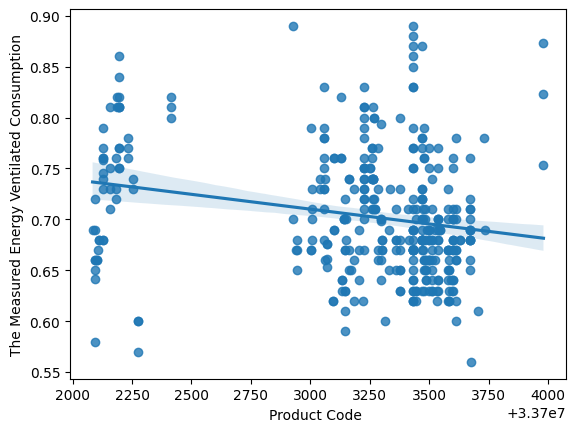

In [17]:
sns.regplot(x="Product Code ", y = "The Measured Energy Ventilated Consumption",data = tests)

While its indeed that there should be no meaningful relationship between product code and energy consumption, the chart above shows that to clearify

In [18]:
columns_to_be_dropped = ["Product Code "]

In [19]:
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns)


## One Hot Encoding Of Other Categorical Columns

As Mentioned above, "Test Function", "Pulsation", "Function Type", "Buffle", "Cooling Fan Type", "Cavity Type", "Ventilation Channel" columns need to be one-hot encoded.

In [20]:
tests.columns

Index(['Product Code ', 'The Measured Energy Ventilated Consumption',
       'Declerated EEI', 'Measured Volume ', 'Test Function ',
       'For 230V Total Working Cycle Power ', 'Pulsation ', 'Function Type',
       'Buffle ', 'Insulation Desc. Kg/m^3', 'Thermal Conductivity (W/mK) ',
       'Cooling Fan Poer ',
       'Cooling fan Type ( T=tangetial fan)/R=radial fan)', 'Cooling Fan RPM',
       'Cavity Fan RPM', 'Number of glass',
       'Cavity Type  (F=Flat/E= Embossed)', 'Ventilation Channel ',
       'Chimney (0: No/1:Yes)'],
      dtype='object')

In [21]:
columns_to_be_encoded = ['Test Function ','Pulsation ','Buffle ','Cavity Type  (F=Flat/E= Embossed)']

## Final Preprocessor

In [22]:
onehot_encoder_transformer = Pipeline(
    steps = [
        ("onehot",OneHotEncoder(handle_unknown = "ignore"))
    ]
)

In [23]:
preprocessor = ColumnTransformer(
    transformers = [
        ("Drop Product Code" , DropColumns(columns = columns_to_be_dropped), columns_to_be_dropped),
        ("Ventilation Channel", ventilation_channel_pipeline, ['Ventilation Channel ']),
        ("Cooling Fan Type",cooling_fan_categorical_transformer,cooling_fan_categorical_columns),
        ("Cooling Fan Power and Cooling Fan RPM",cooling_fan_numeric_transformer,cooling_fan_numerical_columns),
        ("Other Categorical Columns To Be Encoded",onehot_encoder_transformer,columns_to_be_encoded)
    ])

In [24]:
preprocessor

ColumnTransformer(transformers=[('Drop Product Code',
                                 DropColumns(columns=['Product Code ']),
                                 ['Product Code ']),
                                ('Ventilation Channel',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='No '
                                                                           'Ventilation '
                                                                           'Channel',
                                                                strategy='constant')),
                                                 ('One hot encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Ventilation Channel ']),
                                ('Cooling Fan Type',
                                 Pipeline(steps=[('impu...
                                 ['Cooling fan Type ( T=tangetial '
                                  'fan)/R=radial fan)']),
                                ('Cooling Fan Power and Cooling Fan RPM',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['Cooling Fan Poer ', 'Cooling Fan RPM']),
                                ('Other Categorical Columns To Be Encoded',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Test Function ', 'Pulsation ', 'Buffle ',
                                  'Cavity Type  (F=Flat/E= Embossed)'])])

# Test Models

In [25]:
X = tests.drop(['The Measured Energy Ventilated Consumption',
       'Declerated EEI'],axis=1)

In [26]:
y = tests['The Measured Energy Ventilated Consumption']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [29]:
regressor = RandomForestRegressor()

In [30]:
regressor_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("regressor",regressor)
])

In [31]:
regressor_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Drop Product Code',
                                                  DropColumns(columns=['Product '
                                                                       'Code ']),
                                                  ['Product Code ']),
                                                 ('Ventilation Channel',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='No '
                                                                                            'Ventilation '
                                                                                            'Channel',
                                                                                 strategy='constant')),
                                                                  ('One hot '
                                                                   'encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ventilation Channel ']),
                                                 ('Co...
                                                  'Cooling Fan RPM',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['Cooling Fan Poer ',
                                                   'Cooling Fan RPM']),
                                                 ('Other Categorical Columns '
                                                  'To Be Encoded',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Test Function ',
                                                   'Pulsation ', 'Buffle ',
                                                   'Cavity Type  (F=Flat/E= '
                                                   'Embossed)'])])),
                ('regressor', RandomForestRegressor())])

In [32]:
regressor_pipeline.predict(X_test)

array([0.70452455, 0.68008735, 0.64570061, 0.65348261, 0.66919443,
       0.79917428, 0.69251197, 0.70625335, 0.62902867, 0.65394629,
       0.66919443, 0.66919443, 0.69251197, 0.65394629, 0.75437749,
       0.68008735, 0.69251197, 0.62902867, 0.68652821, 0.68008735,
       0.69251197, 0.71704997, 0.71704997, 0.69251197, 0.76601543,
       0.62902867, 0.69251197, 0.66919443, 0.69251197, 0.66919443,
       0.62902867, 0.65348261, 0.79917428, 0.62902867, 0.79241677,
       0.66577252, 0.66919443, 0.68652821, 0.68008735, 0.79241677,
       0.66919443, 0.69251197, 0.72231882, 0.66919443, 0.76941421,
       0.64570061, 0.68008735, 0.69420305, 0.70625335, 0.76601543,
       0.68241196, 0.79917428, 0.68652821, 0.69251197, 0.79241677,
       0.70141175, 0.74601349, 0.70625335, 0.66919443, 0.62902867,
       0.63390462, 0.68652821, 0.66919443, 0.69251197, 0.77703095,
       0.67208699, 0.69251197, 0.68332801, 0.69251197, 0.68652821,
       0.70452455, 0.76601543, 0.68241196, 0.65348261, 0.68008

In [33]:
y_test

290    0.72
357    0.72
261    0.65
157    0.69
145    0.63
       ... 
72     0.74
211    0.69
340    0.65
155    0.64
198    0.66
Name: The Measured Energy Ventilated Consumption, Length: 76, dtype: float64

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(regressor_pipeline.predict(X_test),y_test)

0.02997314276822352

## Classifier

In [36]:
classifier = RandomForestClassifier()

In [37]:
classifier_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier",classifier)
])

In [38]:
X = tests.drop(['The Measured Energy Ventilated Consumption',
       'Declerated EEI'],axis=1)
y = tests['Declerated EEI']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [40]:
classifier_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Drop Product Code',
                                                  DropColumns(columns=['Product '
                                                                       'Code ']),
                                                  ['Product Code ']),
                                                 ('Ventilation Channel',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='No '
                                                                                            'Ventilation '
                                                                                            'Channel',
                                                                                 strategy='constant')),
                                                                  ('One hot '
                                                                   'encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ventilation Channel ']),
                                                 ('Co...
                                                  'Cooling Fan RPM',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['Cooling Fan Poer ',
                                                   'Cooling Fan RPM']),
                                                 ('Other Categorical Columns '
                                                  'To Be Encoded',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Test Function ',
                                                   'Pulsation ', 'Buffle ',
                                                   'Cavity Type  (F=Flat/E= '
                                                   'Embossed)'])])),
                ('classifier', RandomForestClassifier())])

In [41]:
y_pred = classifier_pipeline.predict(X_test)

In [42]:
y_test

290     A
357    A+
261     A
157     A
145     A
       ..
72      A
211    A+
340     A
155    A+
198     A
Name: Declerated EEI, Length: 76, dtype: object

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [45]:
preprocessor

ColumnTransformer(transformers=[('Drop Product Code',
                                 DropColumns(columns=['Product Code ']),
                                 ['Product Code ']),
                                ('Ventilation Channel',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='No '
                                                                           'Ventilation '
                                                                           'Channel',
                                                                strategy='constant')),
                                                 ('One hot encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Ventilation Channel ']),
                                ('Cooling Fan Type',
                                 Pipeline(steps=[('impu...
                                 ['Cooling fan Type ( T=tangetial '
                                  'fan)/R=radial fan)']),
                                ('Cooling Fan Power and Cooling Fan RPM',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['Cooling Fan Poer ', 'Cooling Fan RPM']),
                                ('Other Categorical Columns To Be Encoded',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Test Function ', 'Pulsation ', 'Buffle ',
                                  'Cavity Type  (F=Flat/E= Embossed)'])])

### Save The Preprocessor

In [46]:
import joblib

In [47]:
joblib.dump(preprocessor,"preprocessor.joblib")

['preprocessor.joblib']